### 생선 분류 - 최적의 k 찾기 : 하이퍼파라미터 (모델의 성능에 영향을 끼치는 파라미터)
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타켓/라벨 : Species
- 학습방법 : 지도학습 => 분류
- 학습 알고리즘 : 최근접이웃알고리즘
- 하이퍼파라미터 튜닝 : 모델 성능 개선 (최적의 k를 찾는 것)

[1] 데이터 준비

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
DATA_FILE = r'C:\Hwan\ML_Work\D0826\fish.csv'

In [9]:
# 행 : Bream, Smelt 컬럼: Species, Weight, Height => 0,1,2
fishDF = pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [10]:
# 행 가져오기
mask = (fishDF['Species'] == 'Bream') | (fishDF['Species'] == 'Smelt')
twofishDF = fishDF[mask]

In [11]:
twofishDF.reset_index(drop=True,inplace=True)
twofishDF.index # index 정리 완료 확인

RangeIndex(start=0, stop=49, step=1)

In [12]:
display(twofishDF.head())
twofishDF.tail()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


,Species,Weight,Length
44,Smelt,12.2,12.2
45,Smelt,13.4,12.4
46,Smelt,12.2,13.0
47,Smelt,19.7,14.3
48,Smelt,19.9,15.0


In [13]:
# Species 컬럼을 수치화 => Bream: 0, Smelt: 1
# 오류 원인 : inplace + reset_index 해줘서
twofishDF['FCode'] = twofishDF['Species'].replace({'Bream':0,'Smelt':1})

C:\Users\hwans\AppData\Local\Temp\ipykernel_17728\2851727240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twofishDF['FCode'] = twofishDF['Species'].replace({'Bream':0,'Smelt':1})


In [14]:
twofishDF.head()

,Species,Weight,Length,FCode
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


[2] 피쳐와 타겟 분리

In [15]:
features = twofishDF[['Weight','Length']]
target = twofishDF['FCode']

print(f'features => {features.shape}, {features.ndim}D')
print(f'features => {target.shape}, {target.ndim}D')

features => (49, 2), 2D
features => (49,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# train : test = 80:20 ===> test_size = 0.2 또는 train_size = 0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율 고려 
X_train, X_test, y_train , y_test = train_test_split(features,
                                                     target,
                                                     test_size=0.2,
                                                     stratify=target,
                                                     random_state=10) # 1 - 0.2 = train_size (0.8)

In [18]:
# train:test = 80:20 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print()
print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (39, 2), 2D
y_train : (39,), 1D

X_test : (10, 2), 2D
y_test : (10,), 1D


In [19]:
# target 0 (Bream), 1(Smelt)의 비율 
y_train.value_counts()[0]/y_train.shape[0], y_train.value_counts()[1]/y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [20]:
y_test.value_counts()[0]/y_test.shape[0], y_test.value_counts()[1]/y_test.shape[0]

(0.7, 0.3)

[3-2] 피쳐 스케일링
- KNN의 단점 보완

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
# 스케일러 인스턴스 생성
# 최대값, 최소값을 가지고 정규화
mmScaler = MinMaxScaler()

In [23]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.fit(X_train)

MinMaxScaler()

In [24]:
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [25]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 
# MinMax 스케일링 해준 후 값들 
X_train_scaled = mmScaler.transform(X_train)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()

((39, 2), 0.0, 1.0000000000000002)

In [26]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray
X_test_scaled = mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((10, 2), 0.0033222591362126247, 0.8489882210812445)

[4] 훈련 또는 학습 진행
- 학습 알고리즘 인스턴스 생성 
- 학습 진행 => fit()

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [29]:
# 학습 진행 ==> 학습용 데이터셋
model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [30]:
# 학습 후 모델 파라미터 확인 
#                   우리가 준 샘플 이름   
model.classes_,  model.n_samples_fit_

# ndarray는 컬럼명 없어서 못 갖고옴
# model.feature_names_in_,

(array([0, 1], dtype=int64), 39)

[5] 모델 성능 평가 ==> score() 메서드 + 테스트 데이터셋

In [31]:
model.score(X_test_scaled,y_test)

1.0

[6] 최적의 k 개수 찾기 ==> 모델의 성능 영향 미치는 파라미터
- 하이퍼파라미터

In [56]:
# k의 범위 : 1 ~ 전체 데이터 개수 (1 부터 다 봐야 함) ==> 반복문 

# 시각화를 위해서 변수에 값들을 저장
scores, points = [], []

for k in range(1, 11) : # 데이터의 개수가 39개 
    # 최근접 이웃 데이터 수 설정
    model.n_neighbors = k # 중요 

    # 모델 예측값 추출
    # model.fit(X_test_scaled) # y_test를 안 줘도 됨, 위에서 이미 모델을 학습 시켜서 ~ , ,
    # fit은 모델을 학습 시키는 역할

    # 점수 계산
    jumsu = model.score(X_test_scaled, y_test) # y_test도 줘야함

    # jumsu에는 현재 값이 저장되어 있고, score에는 이전 값이 저장되어 있음
    if k > 1 :
        if jumsu != scores[-1] : points.append(k)
    # print해도 되고 시각화 시켜도 상관 X
    scores.append(jumsu)



: 

In [46]:
points

[6]

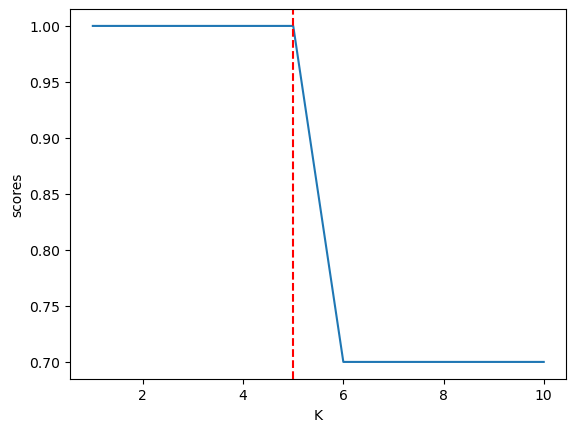

In [52]:
# 시각화

# x축 : k, y축 : 점수

plt.plot(range(1,11), scores)
plt.xlabel("K")
plt.ylabel("scores")
plt.axvline(points[0]-1, 0.0, 1.0, color = "red", linestyle = "dashed") # 그래프에 수직선을 긋는 것 hline : 수평으로 선을 긋는 것, axvline : 축에다가 v 라인을 긋는 것
#  dashed : 점선으로 표시, y축 최소값 0.0, y축 최대값 1.0
# points[0]-1을 하는 이유 : 값이 떨어지는 바로 전 값을 찾기 위해서 -1을 함 
# -1을 하지 않으면 값이 떨어진 후의 값을 내기 때문에 
plt.show()

[7] 예측하기 ===> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의 : 입력 데이터 ==> 2D

In [ ]:
# new_data = [413, 27.8] # "1D가 아님"
new_data = pd.DataFrame([[413, 27.8]], columns=['Weight','Length']) # "2D"
new_data

In [ ]:
new_data_scaled = mmScaler.transform(new_data) # 0.0 ~ 1.0 범위 안에 존재
new_data_scaled

In [ ]:
# 임의의 새로운 데이터의 예측 
model.predict(new_data_scaled) # new_data를 DataFrame으로 안 만들어주면 경고 뜸

In [ ]:
### 최근접한 k개의 데이터 찾기
distance, idx  = model.kneighbors(new_data_scaled)

In [ ]:
distance

In [ ]:
idx

In [ ]:
# shape 1D로 바꿔주기 - reshape --> tolist()로 리스트로 만들어주기
neighbors = idx.reshape(-1).tolist()

In [ ]:
print(X_train_scaled[neighbors])
X_train_scaled[neighbors].shape

In [ ]:
k_weight = X_train_scaled[neighbors][:,0]
k_length = X_train_scaled[neighbors][:,1]

print(new_data_scaled)
print(k_weight, k_length, sep='\n')

In [ ]:
new_data_scaled[0,0], new_data_scaled[0,1]

In [ ]:
### 시각화로 확인 
# display(twofishDF)
# 밑에 있는 주황색 값에 영향을 많이 받음

# plt.scatter(x=twofishDF.loc[:34, 'Weight'], y=twofishDF.loc[:34, 'Length']) # Bream
# plt.scatter(x=twofishDF.loc[35:,'Weight'], y=twofishDF.loc[35:,'Length']) # Smelt
# plt.plot(new_data_scaled[0,0], new_data_scaled[0,1], 'r^')
# plt.scatter(k_weight, k_length)
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1] )
plt.show()